In [36]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [37]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

In [38]:
df = pd.read_csv("/content/Crop_recommendation.csv")

In [39]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice



### **Features:**
1. **N (Nitrogen)**: Amount of nitrogen present in the soil (in kg/ha).
2. **P (Phosphorus)**: Amount of phosphorus present in the soil (in kg/ha).
3. **K (Potassium)**: Amount of potassium present in the soil (in kg/ha).
4. **Temperature**: Temperature of the region in Celsius (°C).
5. **Humidity**: Humidity level of the region (percentage).
6. **pH**: pH level of the soil.
7. **Rainfall**: Amount of rainfall in the region (in mm).
8. **Label (Crop Type)**:

### **Target Variable:**
- **Label**: The target variable is the type of crop (`rice` in the example data) that should be planted based on the given features. This column contains categorical values indicating the crop type.




In [40]:
y=df['label'].value_counts()

In [41]:
y

,count
label,
rice,100
maize,100
jute,100
cotton,100
coconut,100
papaya,100
orange,100
apple,100
muskmelon,100


In [42]:
df.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


<Axes: >

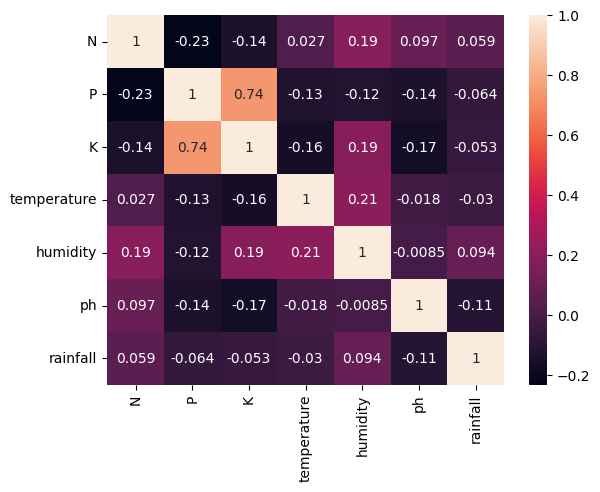

In [44]:
numerical_df = df.select_dtypes(include=['number'])
corr_matrix = numerical_df.corr()
sns.heatmap(corr_matrix, annot=True)

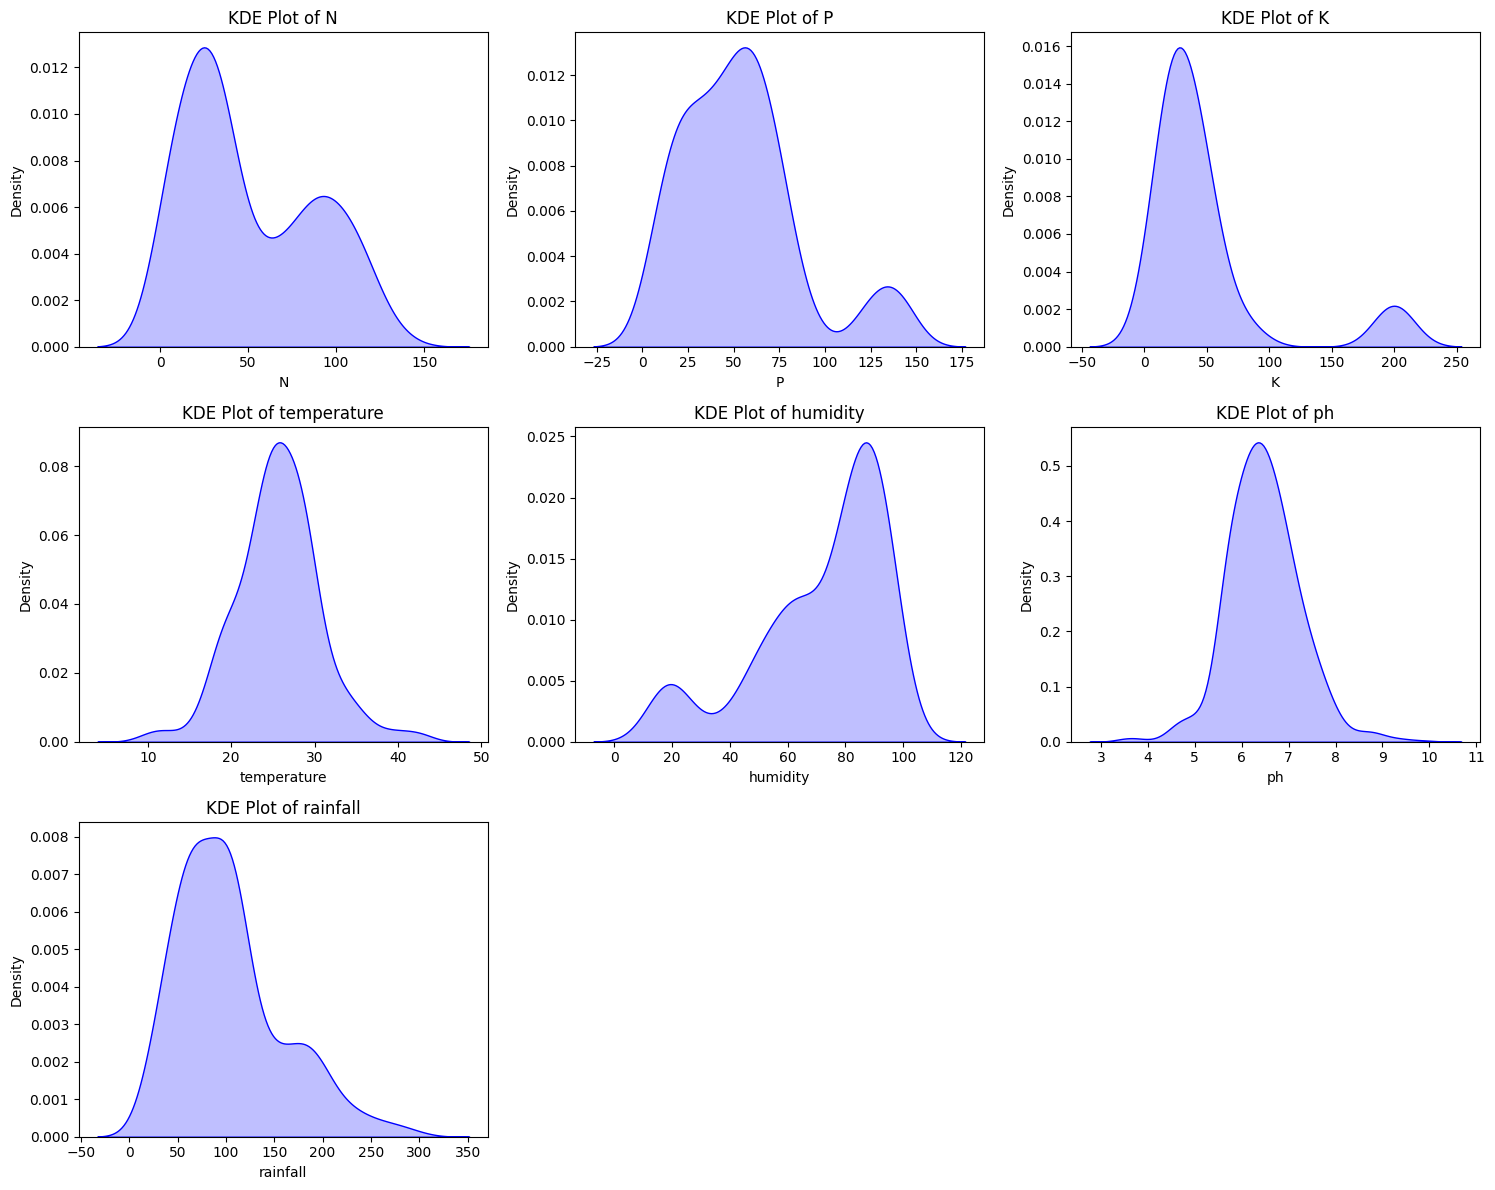

In [45]:
numerical_features = df.select_dtypes(include=['int64', 'float64'])

# Plot KDE for each numerical feature
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_features.columns, 1):
    plt.subplot((len(numerical_features.columns) + 2) // 3, 3, i)  # Adjust the layout
    sns.kdeplot(data=numerical_features[col], fill=True, color="blue", bw_adjust=1.5)
    plt.title(f"KDE Plot of {col}")
    plt.xlabel(col)
    plt.ylabel("Density")
plt.tight_layout()
plt.show()

In [53]:
# Features and target
X = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = df['label']

In [58]:

# Initialize LabelEncoder
le = LabelEncoder()

# Fit and transform the target column
df['label_encoded'] = le.fit_transform(df['label'])

# Mapping of original labels to encoded values
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(label_mapping)

{'apple': 0, 'banana': 1, 'blackgram': 2, 'chickpea': 3, 'coconut': 4, 'coffee': 5, 'cotton': 6, 'grapes': 7, 'jute': 8, 'kidneybeans': 9, 'lentil': 10, 'maize': 11, 'mango': 12, 'mothbeans': 13, 'mungbean': 14, 'muskmelon': 15, 'orange': 16, 'papaya': 17, 'pigeonpeas': 18, 'pomegranate': 19, 'rice': 20, 'watermelon': 21}


In [59]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [60]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label,label_encoded
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,20


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
